# [HW10] Problem: Expectation Maximization (EM) Algorithm: A closer look!

Import necessary Python packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Define relevant functions.

In [2]:
def generate_data(mu_1, mu_2, n_examples, sigma_1 = 0.5, sigma_2 = 0.5):
    # Generate sample data points from 2 distributions: (mu_1, sigma_1) and (mu_2, sigma_2)
    d_1 = np.random.normal(mu_1, sigma_1, n_examples)
    d_2 = np.random.normal(mu_2, sigma_2, n_examples)
    x = np.concatenate([d_1, d_2])
    return d_1, d_2, x

def plot_data(d_1, d_2):
    # Plot scatter plot of data samples, labeled by class
    plt.figure()
    plt.scatter(d_1, np.zeros(len(d_1)), c='b', s=80., marker='+')
    plt.scatter(d_2, np.zeros(len(d_2)), c='r', s=80.)
    plt.title("Sample data using: mu = " + str(mu) + " n_train = " + str(len(d_1)+len(d_2)))
    plt.show()
    return

def plot_data_and_distr(d_1, d_2, mu_1, mu_2, sigma_1=0.5, sigma_2=0.5, title = ""):
    # Plot scatter plot of data samples overlayed with distribution of estimated means: mu_1 and mu_2
    plt.scatter(d_1, np.zeros(len(d_1)), c='b')
    scale = [min(mu_1-3*sigma_1, mu_2-3*sigma_2), max(mu_1+3*sigma_1, mu_2+3*sigma_2)]
    plt.scatter(d_2, np.zeros(len(d_2)), c='r')
    x_axis = np.arange(scale[0], scale[1], 0.001)
    plt.plot(x_axis, norm.pdf(x_axis,mu_1, sigma_1), c='b')
    x_axis = np.arange(scale[0], scale[1], 0.001)
    plt.plot(x_axis, norm.pdf(x_axis,mu_2,sigma_2), c='r')
    plt.title(title)
    plt.show()


def grad_ascent(x, mu, mu_true, sigma = 0.5, iterations = 250):
    # Run gradient ascent on the likelihood of a point belonging to a class and compare the estimates of the mean
    #     at each iteration with the true mean of the distribution
    # Note: the original dataset comes from 2 distributions centered at mu and -mu, which this takes into account
    #     with each update
    diff_mu = []
    alpha = 0.05
    for i in range(iterations):
        phi_1 = np.exp(-np.square(x-mu)/(2*np.square(sigma)))
        phi_2 = np.exp(-np.square(x+mu)/(2*np.square(sigma)))
        w = phi_1/(phi_1 + phi_2)
        em = (1/len(x))*np.sum((2*w - 1)*x)
        mu = mu*(1-alpha) + alpha*em
        diff_mu.append(np.abs(mu-mu_true))
    return mu, sigma,diff_mu


def em(x, mu, mu_true, sigma = 0.5, iterations = 250):
    # Run the EM algorithm to find the estimated mean of the dataset
    # Note: the original dataset comes from 2 distributions centered at mu and -mu, which this takes into account
    #     with each update
    diff_mu = np.zeros(iterations)
    for i in range(iterations):
        phi_1 = np.exp(-np.square(x-mu)/(2*np.square(sigma)))
        phi_2 = np.exp(-np.square(x+mu)/(2*np.square(sigma)))
        w = phi_1/(phi_1 + phi_2)
    
        mu = (1/len(x))*np.sum((2*w - 1)*x)
        diff_mu[i]  = np.abs(mu-mu_true)
    return mu, sigma,diff_mu

def kmeans(x, mu, mu_true, sigma = 0.5, iterations = 250):
    # Run the K means algorithm to find the estimated mean of the dataset
    # Note: the original dataset comes from 2 distributions centered at mu and -mu, which this takes into account
    #     with each update
    diff_mu = np.zeros(iterations)

    for i in range(iterations):
        mu_1 = mu
        mu_2 = -mu
        set1 = []
        set2 = []
        for x_i in x:
            if np.abs(x_i - mu_1) <= np.abs(x_i - mu_2):
                set1.append(x_i)
            else:
                set2.append(x_i)
        mu_1_new = np.mean(set1)
        mu_2_new = np.mean(set2)
        # Estimates two means and combines them to get mu for the next iteration
        mu = np.abs(len(set1)*mu_1_new - len(set2)*mu_2_new)/(len(set1)+len(set2))
        diff_mu[i]  = np.abs(mu-mu_true)
    return mu, sigma, diff_mu


def plot_differences(iterations, diff_mu_ga, diff_mu_em, mu, n_examples):
    # Make plot comparing convergence of means to true mean for gradient descent and EM
    plt.plot(np.arange(iterations), diff_mu_ga, c = 'r', label='GD')
    plt.plot(np.arange(iterations), diff_mu_em, c = 'b', label='EM')
    plt.legend()
    plt.title("Difference between estimated and true mean when: mu = " + str(mu) + " n_train = " + str(n_examples))
    plt.xlabel("iterations for Training")
    plt.ylabel("Absolute value of difference to true mean")
    plt.show()


def plot_ll(x, scale=[-5, 5]):
    # if you want to visualize the likelihood function as a function of mu
    mus = np.linspace(scale[0], scale[1], 200)
    ll = np.zeros(mus.shape)
    for j, mu in enumerate(mus):
        ll[j] = 0.
        for xi in x:
            ll[j] += np.log(np.exp(-(xi-mu)**2/2)+np.exp(-(xi+mu)**2/2)) - np.log(2*np.sqrt(2*np.pi))
    plt.plot(mus, ll)
    plt.show()
    return

## Part (l)

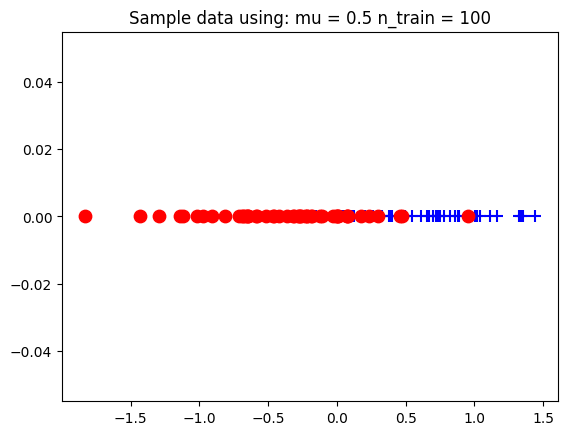

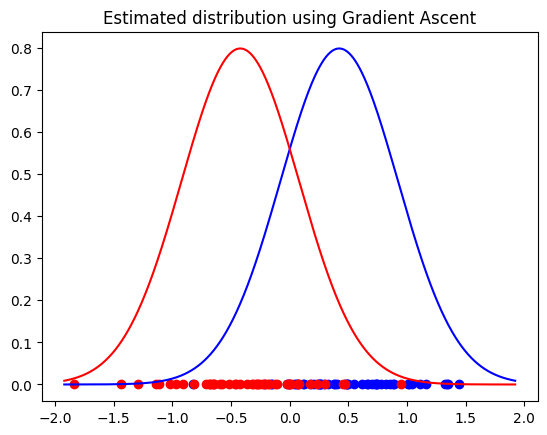

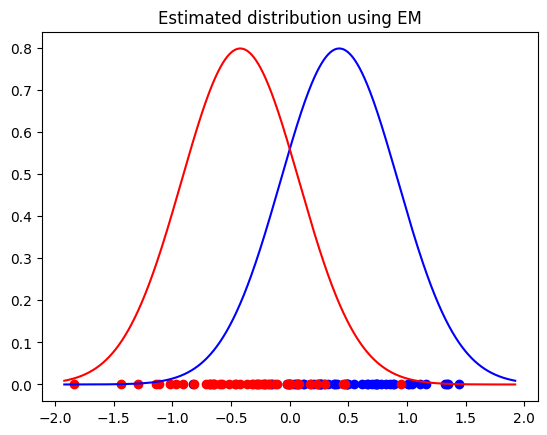

------------
n_points: 100 , True mean:0.500, GA (final) estimate:0.422, EM (final) estimate:0.422
------------


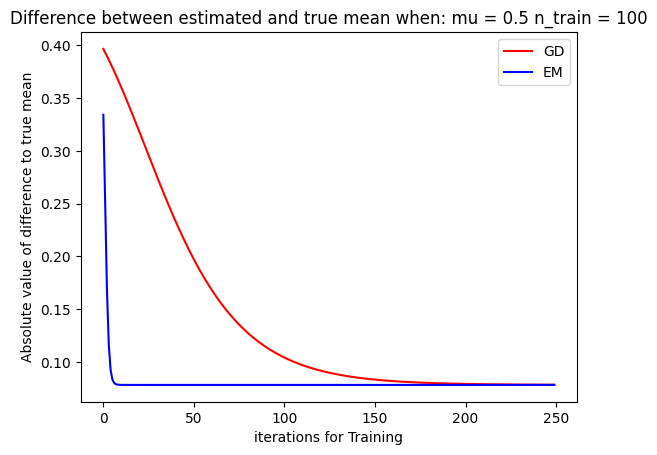

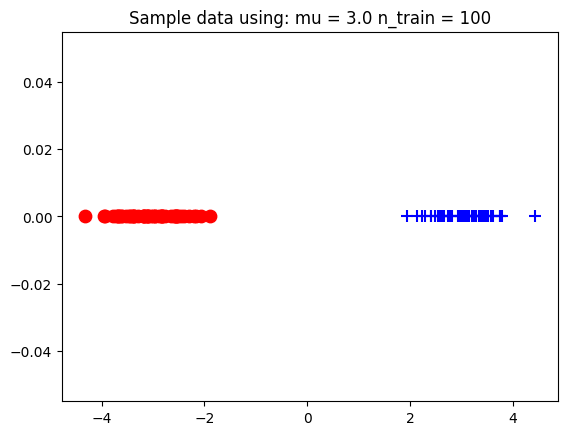

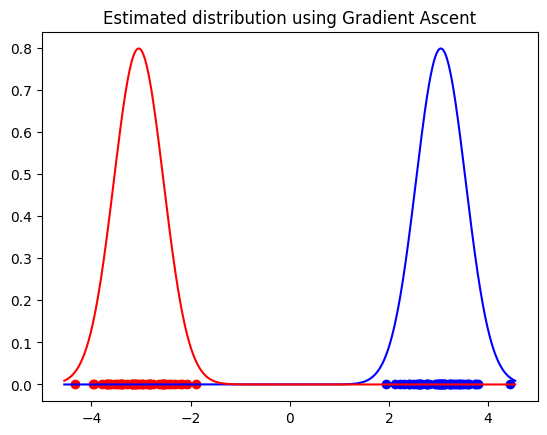

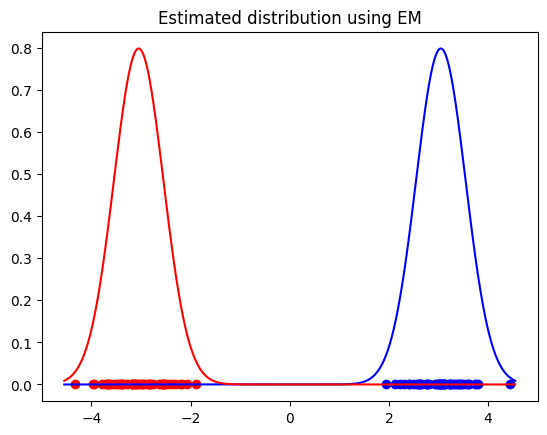

------------
n_points: 100 , True mean:3.000, GA (final) estimate:3.046, EM (final) estimate:3.046
------------


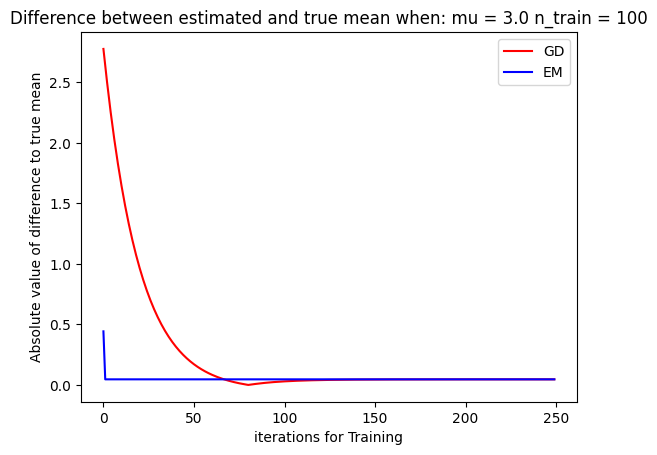

In [3]:
##############################################################################
# Set this to True if you want to visualize the distribution estimated by each method
visualize_distr = True
##############################################################################

#np.random.seed(12312)
mu_list = [.5, 3.]
n_train_list = [50]
mu_start = 0.1

for mu in mu_list:
    for n_train in n_train_list:
        d_1, d_2, x = generate_data(mu, -mu, n_examples = n_train)
        plot_data(d_1, d_2)

        # Code for part m

        mu_ga, sigma_gd, diff_mu_ga = grad_ascent(x, mu_start, mu)
        mu_em, sigma_em, diff_mu_em = em(x, mu_start, mu)
        if visualize_distr:
          plot_data_and_distr(d_1, d_2, mu_ga, -mu_ga, title = "Estimated distribution using Gradient Ascent")
          plot_data_and_distr(d_1, d_2, mu_em, -mu_em, title = "Estimated distribution using EM")
        print ("------------")
        print("n_points:", n_train*2, ", True mean:{:.3f}, GA (final) estimate:{:.3f}, EM (final) estimate:{:.3f}".format(mu, mu_ga, mu_em)) #, "GA (final) mean: {.3f}", mu_ga, "EM (final) mean: {.3f}", mu_em)
        print ("------------")
        plot_differences(250, diff_mu_ga, diff_mu_em, mu, 2*n_train)

          

## Part (m)

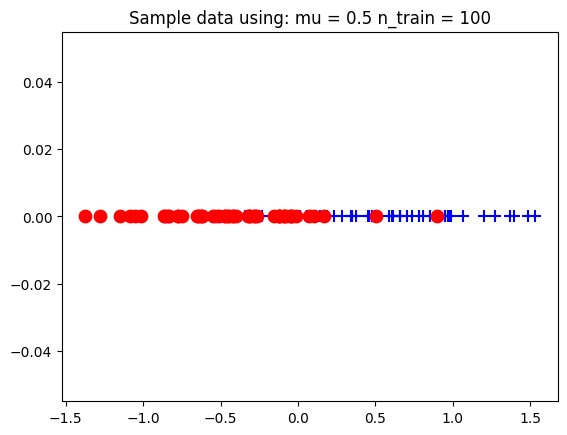

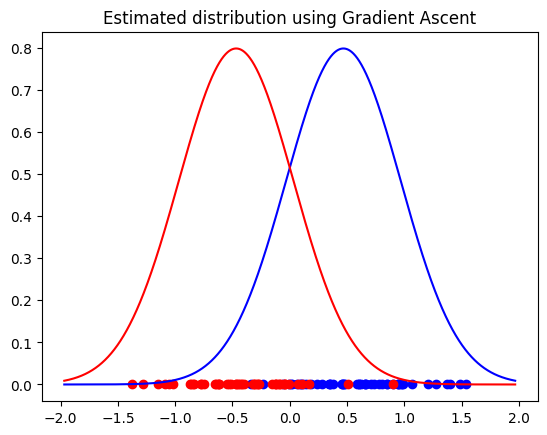

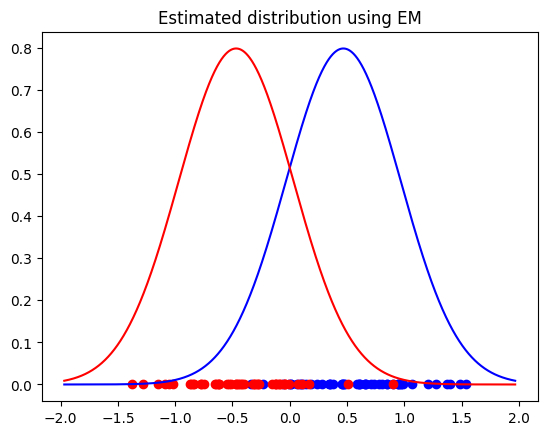

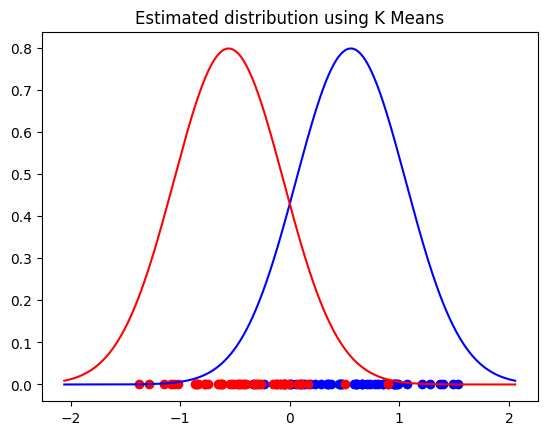

------------
True mean:0.500, GA (final) estimate:0.468, EM (final) estimate:0.468, K-Means (final) estimate:0.557
------------


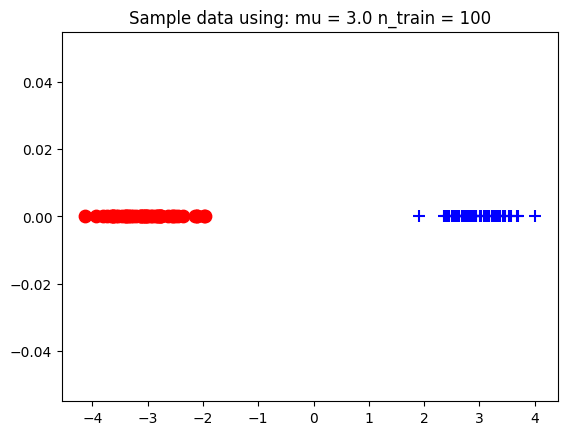

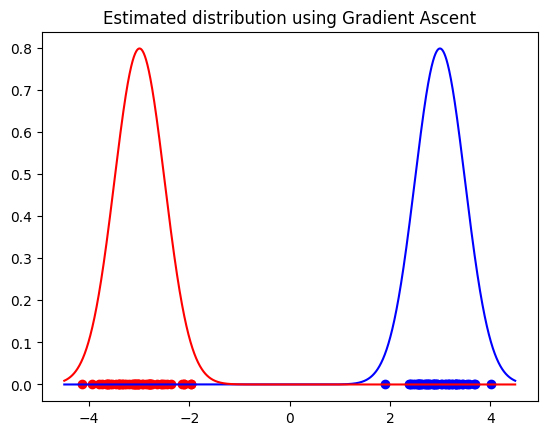

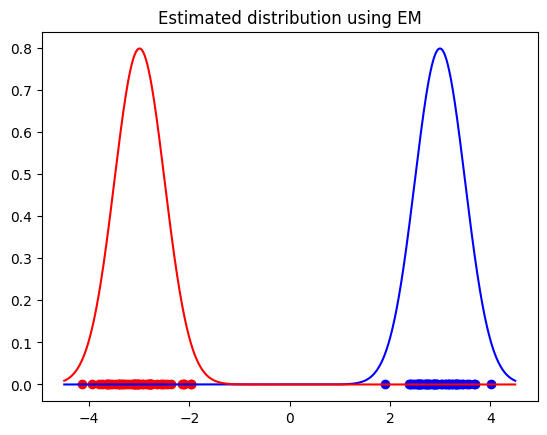

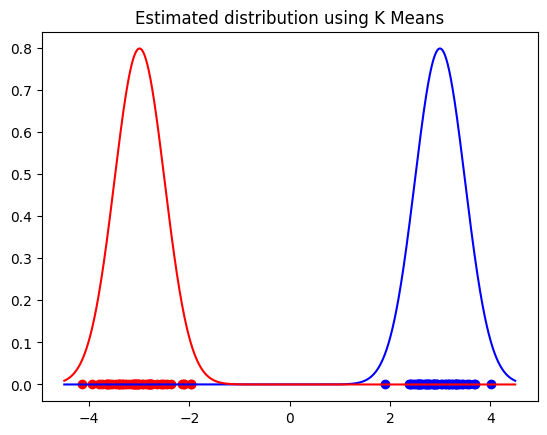

------------
True mean:3.000, GA (final) estimate:2.995, EM (final) estimate:2.995, K-Means (final) estimate:2.995
------------


In [4]:
##############################################################################
# Set this to True if you want to visualize the distribution estimated by each method
visualize_distr = True
##############################################################################

#np.random.seed(12312)
mu_list = [.5, 3.]
n_train_list = [50]
mu_start = 0.1

for mu in mu_list:
    for n_train in n_train_list:
        d_1, d_2, x = generate_data(mu, -mu, n_examples = n_train)
        plot_data(d_1, d_2)

        mu_ga, sigma_gd, diff_mu_ga = grad_ascent(x, mu_start, mu)
        mu_em, sigma_em, diff_mu_em = em(x, mu_start, mu)
        mu_k, sigma_k, diff_mu_k = kmeans(x, mu_start, mu)
        if visualize_distr:
          plot_data_and_distr(d_1, d_2, mu_ga, -mu_ga, title = "Estimated distribution using Gradient Ascent")
          plot_data_and_distr(d_1, d_2, mu_em, -mu_em, title = "Estimated distribution using EM")
          plot_data_and_distr(d_1, d_2, mu_k, -mu_k, title = "Estimated distribution using K Means")
        print ("------------")
        print("True mean:{:.3f}, GA (final) estimate:{:.3f}, EM (final) estimate:{:.3f}, K-Means (final) estimate:{:.3f}".format(mu, mu_ga, mu_em, mu_k))
        print ("------------")
